In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [5]:
Climatology = pd.read_excel(r'[YOUR LOCATION HERE]\YHM Climate Normals 1981-2010.xlsx')
Climatology.head(15)

,Month,Daily Average Temperature,Daily Maximum Temperature,Daily Minimum Temperature,Extreme Maximum Temperature,Rainfall (mm),Snowfall (cm),Precipitation (mm),Average Wind Speed (km/h),Yearly Precipitation Average
0,January,-5.5,-1.7,-9.3,16.7,29.7,40.8,64.0,19.5,77.508333
1,February,-4.6,-0.5,-8.6,15.8,28.2,35.1,57.8,18.6,NaN
2,March,-0.1,4.3,-4.5,25.0,42.6,26.5,68.4,18.5,NaN
3,April,6.7,11.8,1.5,29.7,71.3,8.4,79.1,18.6,NaN
4,May,12.8,18.5,7.1,33.1,78.7,0.5,79.4,15.9,NaN
5,June,18.3,23.9,12.6,35.0,84.9,0.0,84.9,14.0,NaN
6,July,20.9,26.5,15.2,37.4,100.7,0.0,100.7,12.6,NaN
7,August,20.0,25.3,14.5,36.4,79.2,0.0,79.2,11.8,NaN
8,September,15.8,21.2,10.4,34.4,81.9,0.0,81.9,13.1,NaN
9,October,9.3,14.1,4.5,30.3,76.5,0.7,77.4,15.6,NaN


In [12]:
rainfall_total = Climatology['Rainfall (mm)'].sum().round(2)
print(f"Rainfall Sum: {rainfall_total} mm")

snowfall_total = Climatology['Snowfall (cm)'].sum().round(2)
print(f"Snowfall Sum: {snowfall_total} cm")

precipitation_total = Climatology['Precipitation (mm)'].sum().round(2)
print(f"Precipitation Total: {precipitation_total} mm")

precipitation_average = Climatology['Precipitation (mm)'].mean().round(2)
print(f"Precipitation Average: {precipitation_average} mm/month")

september_average = Climatology[Climatology['Month'] == 'September']['Rainfall (mm)'].mean()
print(september_average)

Rainfall Sum: 791.9 mm
Snowfall Sum: 156.5 cm
Precipitation Total: 930.1 mm
Precipitation Average: 77.51 mm/month
81.9


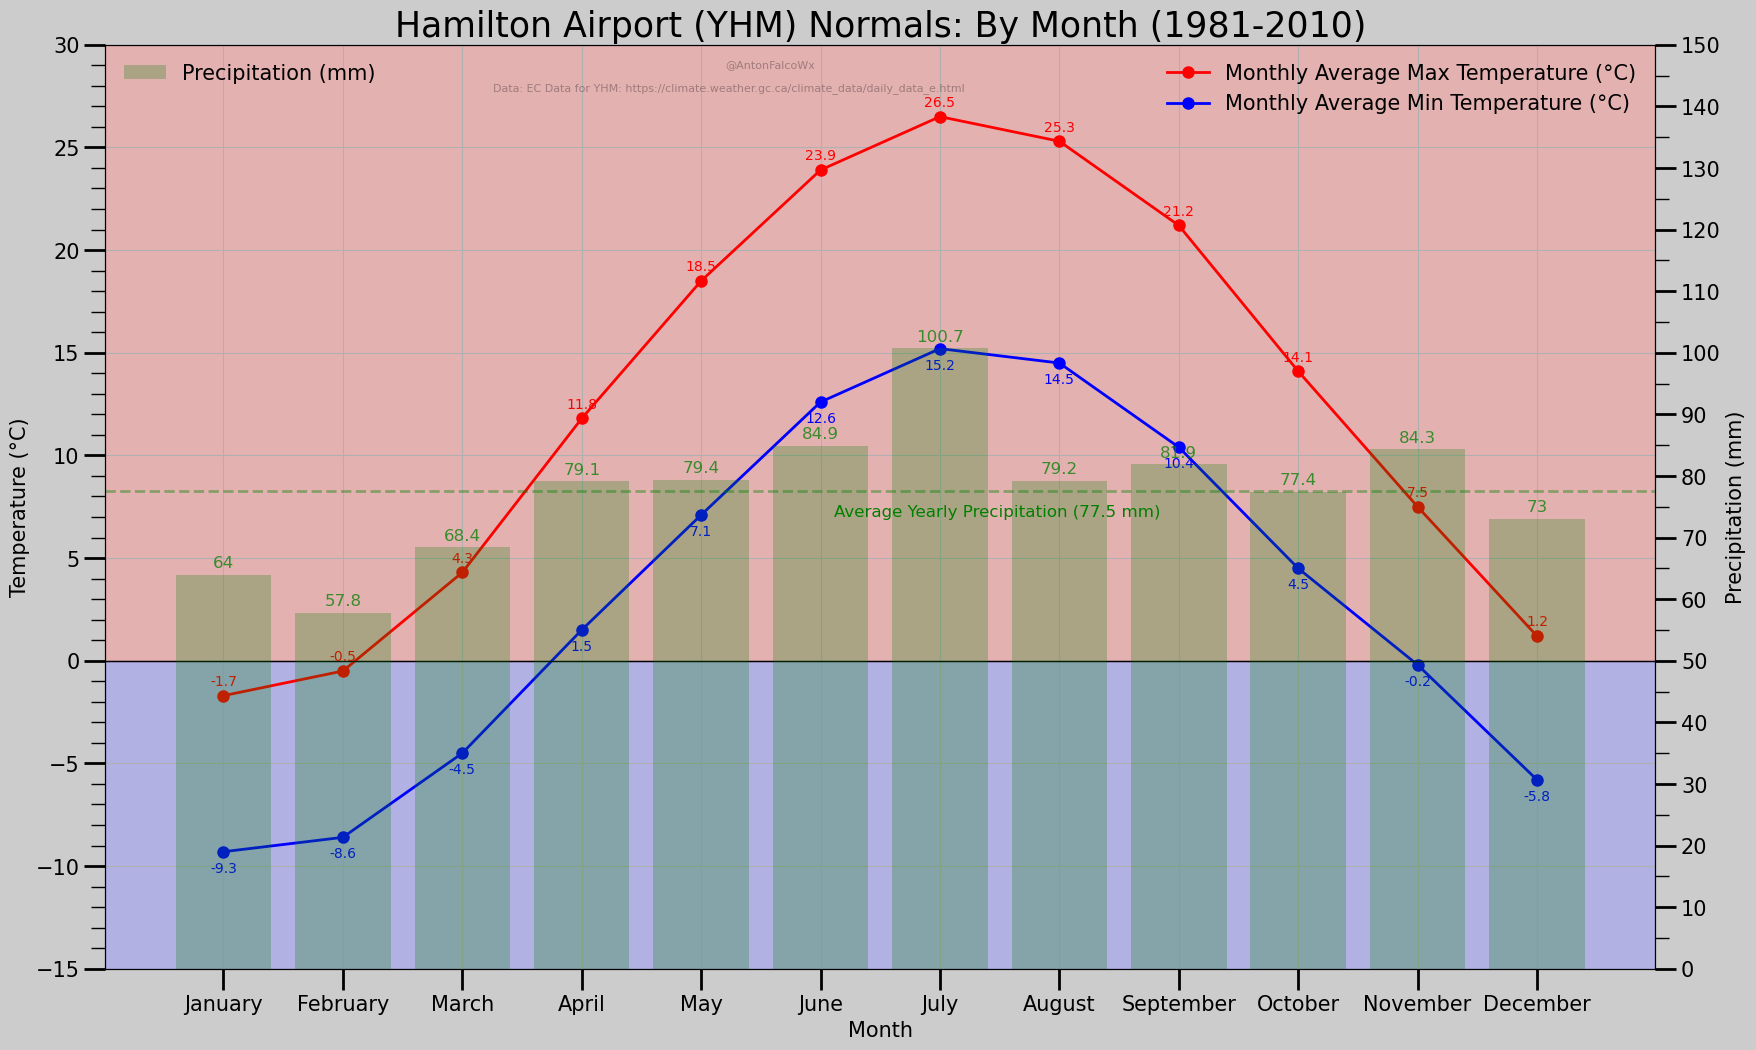

In [4]:
fig, ax = plt.subplots(figsize=(20,12))
ax2 = ax.twinx()
ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')

#Line Graph and Annotations
Month = (Climatology['Month'])
Max = (Climatology['Daily Maximum Temperature'])
Min = (Climatology['Daily Minimum Temperature'])
Average = (Climatology['Daily Average Temperature'])

#Monthly Max
ax.plot(Climatology['Month'], Climatology['Daily Maximum Temperature'], '-o', ms=8, color='red', linewidth=2.0)  
for i, txt in enumerate(Max):
    ax.annotate(txt, (Month[i], Max[i]+0.5), ha='center', c='red', fontsize=10)

#Monthly Min
ax.plot(Climatology['Month'], Climatology['Daily Minimum Temperature'], '-o', ms=8, color='blue', linewidth=2.0)
for i, txt in enumerate(Min):
    ax.annotate(txt, (Month[i], Min[i]-1), ha='center', c='blue', fontsize=10)

#Monthly Average
#ax.plot(Climatology['Month'], Climatology['Daily Average Temperature'], '-o', ms=8, color='black', linestyle='dashed', linewidth=2.0)
#for i, txt in enumerate(Average):
#    ax.annotate(txt, (Month[i], Average[i]+0.5), ha='center', c='black', fontsize=8)


#Precipitation Bar and Label
#ax2.bar(data['Month'], data['Precipitation (mm)'],alpha=0.4, color='g')
Precip = ax2.bar(Climatology['Month'], Climatology['Precipitation (mm)'], alpha=0.25, color='g')
plt.bar_label(Precip, padding=3, fontsize=12, color='g', alpha=0.75)


#Graph Labels
ax.set_title("Hamilton Airport (YHM) Normals: By Month (1981-2010)",fontweight='bold', fontsize=25)
ax.set_xlabel("Month",fontweight='bold', fontsize=15)
ax.set_ylabel("Temperature (°C)",fontweight='bold', fontsize=15)

#Second y-axis labels and limits
ax2.set_ylabel("Precipitation (mm)",fontweight='bold', fontsize=15)
ax2.set_ylim([0.0, 150])
ax.set_ylim([-15, 30])


#Legends (need two)
ax.legend(["Monthly Average Max Temperature (°C)", "Monthly Average Min Temperature (°C)", "Average Temperature (°C)"], fontsize=15, frameon=False)
ax2.legend(["Precipitation (mm)"], loc=2, fontsize=15, frameon=False)

#Adding name(@)
plt.text(0.4, 0.975, '@AntonFalcoWx', fontsize = 8, transform=ax.transAxes, alpha=0.3)
plt.text(0.25, 0.95, 'Data: EC Data for YHM: https://climate.weather.gc.ca/climate_data/daily_data_e.html', fontsize = 8, transform=ax.transAxes, alpha=0.3)
plt.text(0.47, 0.49, 'Average Yearly Precipitation (77.5 mm)', fontsize = 12, color='green', transform=ax.transAxes)

#Average lines
#ax.axhline(12.5,0,28,color='red',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax2.axhline(77.5,0,28,color='green',linewidth=2.0,linestyle='dashed',alpha=0.4)
ax.axhline(0,0,28,color='black',linewidth=1.0,linestyle='solid')

#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_major_locator(MultipleLocator())
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator(5))
ax2.yaxis.set_major_locator(MultipleLocator(10))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)

#Shaded background
ax.axhspan(30, 0, alpha=0.2, color='r')
ax.axhspan(0, -15, alpha=0.2, color='b')


#plt.savefig('YHM_Normals.jpg', dpi=300)
ax.grid()
plt.show()
plt.close()